In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [2]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.025493,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10.435288,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
uncontacted = df[df['pdays'] == 999].shape[0]
uncontacted

35696

In [4]:
have_deposit = df[df['y'] == 'yes']
have_deposit


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
67,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
75,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
79,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
116,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
125,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37057,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
37060,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
37063,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
37064,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
# Create a contingency table
contingency_table = pd.crosstab(df['marital'], df['y'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the p-value
if p < 0.05:
    print("There is a significant association between marriage status and having a deposit.")
else:
    print("There is no significant association between marriage status and having a deposit.")

Chi-square statistic: 107.58814632528697
P-value: 3.6252248706486453e-23
There is a significant association between marriage status and having a deposit.


In [6]:
# Filter the DataFrame to include only people who have a deposit
deposit_df = df[df['y'] == 'yes']

# Count the number of people who have a deposit and are married
deposit_and_married = deposit_df[deposit_df['marital'] == 'married'].shape[0]

# Count the total number of people who have a deposit
total_with_deposit = deposit_df.shape[0]

# Calculate the percentage
percentage = (deposit_and_married / total_with_deposit) * 100

# Print the result
print(f"Percentage of people who have a deposit and are married: {percentage:.2f}%")

Percentage of people who have a deposit and are married: 54.54%


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame and 'y' is the target variable
# Preprocess the data
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)
# Define features and target
X = df.drop('y_yes', axis=1)  # Assuming 'y' column is binary and converted to 'y_yes' after get_dummies
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      6528
        True       0.58      0.28      0.38       886

    accuracy                           0.89      7414
   macro avg       0.74      0.63      0.66      7414
weighted avg       0.87      0.89      0.87      7414



Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      6528
        True       0.58      0.28      0.38       886

    accuracy                           0.89      7414
   macro avg       0.74      0.63      0.66      7414
weighted avg       0.87      0.89      0.87      7414



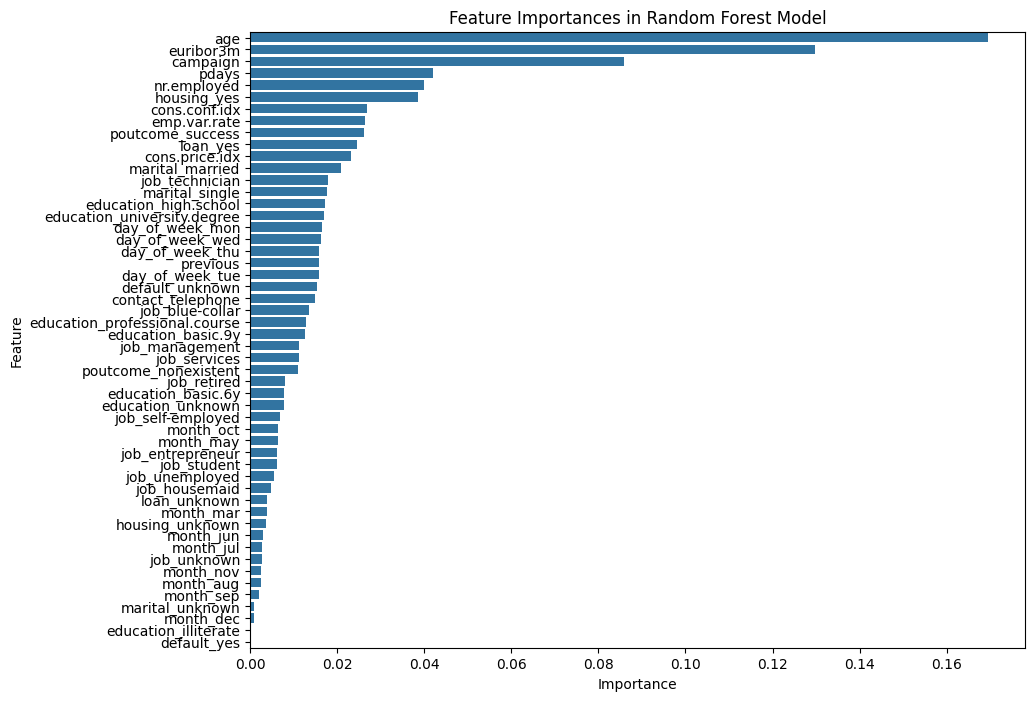

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'y' is the target variable
# Preprocess the data
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('y_yes', axis=1)  # Assuming 'y' column is binary and converted to 'y_yes' after get_dummies
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the training data
# Assuming df is your DataFrame and 'y' is the target variable
# Preprocess the data
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)
# Define features and target
X = df.drop('y_yes', axis=1)  # Assuming 'y' column is binary and converted to 'y_yes' after get_dummies
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Load the mini holdout test set
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Preprocess the mini holdout test set
test_onehot = pd.get_dummies(test, drop_first=True)

# Ensure the test set has the same columns as the training set
missing_cols = set(X_train.columns) - set(test_onehot.columns)
for col in missing_cols:
    test_onehot[col] = 0
test_onehot = test_onehot[X_train.columns]

# Make predictions on the mini holdout test set
predictions = rf.predict(test_onehot)

# Convert the predictions to 0 and 1
predictions = [1 if pred else 0 for pred in predictions]

# Convert the predictions to a dataframe and label the column 'y'
my_predictions = pd.DataFrame(predictions, columns=['predictions'])

# Replace PUTTEAMNUMBERHERE with your team
my_predictions.to_csv("team2_rf-module2-predictions.csv", index=False)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      6528
        True       0.58      0.28      0.38       886

    accuracy                           0.89      7414
   macro avg       0.74      0.63      0.66      7414
weighted avg       0.87      0.89      0.87      7414

